#### Introduction 
The data was published in 2016 from LendingClub.com. It has been cleaned of NA values for the purpose of this project. The purpose of this project is to develop a model that predicts if a borrower will pay back their loan in full.

Here are what the columns represent
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

custom_style = {'axes.titlesize':'15',
                'axes.titlecolor':'black',
                'xtick.color': 'black',
                'ytick.color': 'black'}
sns.set(style= 'darkgrid', rc=custom_style)

In [2]:
loans = pd.read_csv('loan_data.csv')

In [3]:
loans.info()
# the data set looks clean with no missing rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


#### Exploratory data analysis

/Users/livernteo/Documents/lvt_projects/env/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


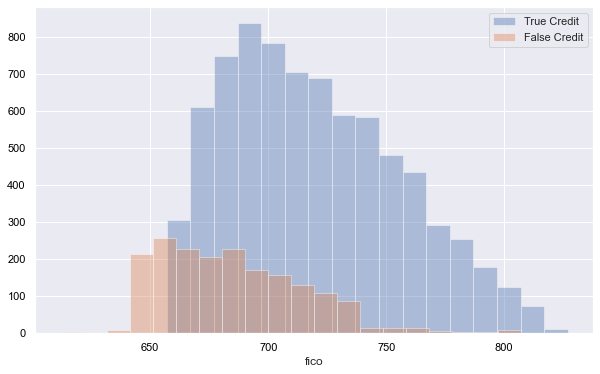

In [6]:
plt.figure(figsize=(10,6))
sns.distplot(loans[loans['credit.policy'] == 1]['fico'],
             bins=20,kde=False,norm_hist=False,label='True Credit')
sns.distplot(loans[loans['credit.policy'] == 0]['fico'],
             bins=20,kde=False,norm_hist=False,label='False Credit')
plt.legend()

**Observation** 
<br>
Applicants with a fico score < ~ 660 fail the credit underwriting criteria of LendingClub.com. The average fico score is around 700.

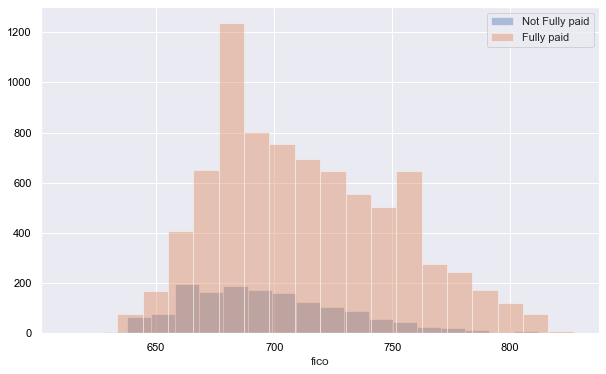

In [7]:
plt.figure(figsize=(10,6))
sns.distplot(loans[loans['not.fully.paid'] == 1]['fico'],
             bins=20,kde=False,norm_hist=False,label='Not Fully paid')
sns.distplot(loans[loans['not.fully.paid'] == 0]['fico'],
             bins=20,kde=False,norm_hist=False,label='Fully paid')
plt.legend()

In [8]:
from math import floor
def round_down(num, divisor):
    return floor(num / divisor) * divisor

Text(0, 0.5, 'percentage')

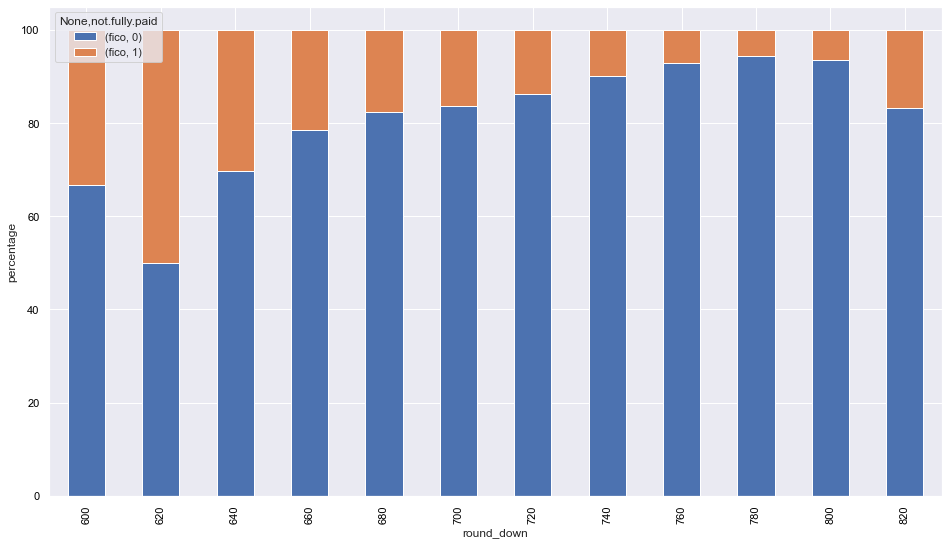

In [9]:
df = pd.DataFrame(loans[['fico','not.fully.paid']],
                  columns=['fico','not.fully.paid','round_down'])
df['round_down'] = df['fico'].apply(lambda x : round_down(x,20))
df = df.groupby(['round_down','not.fully.paid']).count()
df2 = df.groupby(level=0).apply(lambda x: x/x.sum()*100)
df2.unstack(level=1)
ax = df2.unstack(level=1).plot(kind='bar', figsize=(16,9),stacked= True)
ax.set_ylabel('percentage')

##### Observation 
The higest proportion of those that end up not fully paying the loan was those with credit scores between 620-639. For the most part, as many would expect, the percentage of unpaid loans decreases as credit scores increase, but there was a spike in unpaid loans for those with credit scores between 820-839.

<AxesSubplot:xlabel='purpose', ylabel='count'>

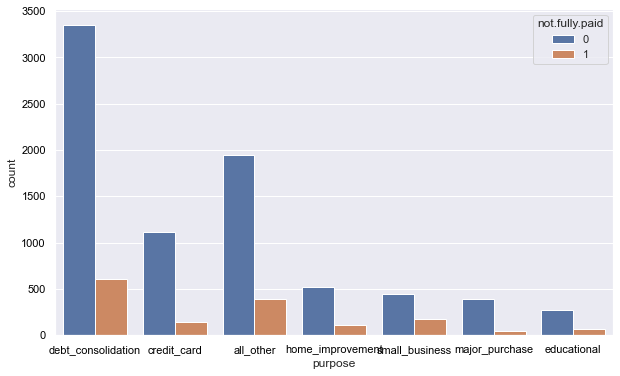

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans)

Text(0, 0.5, 'percentage')

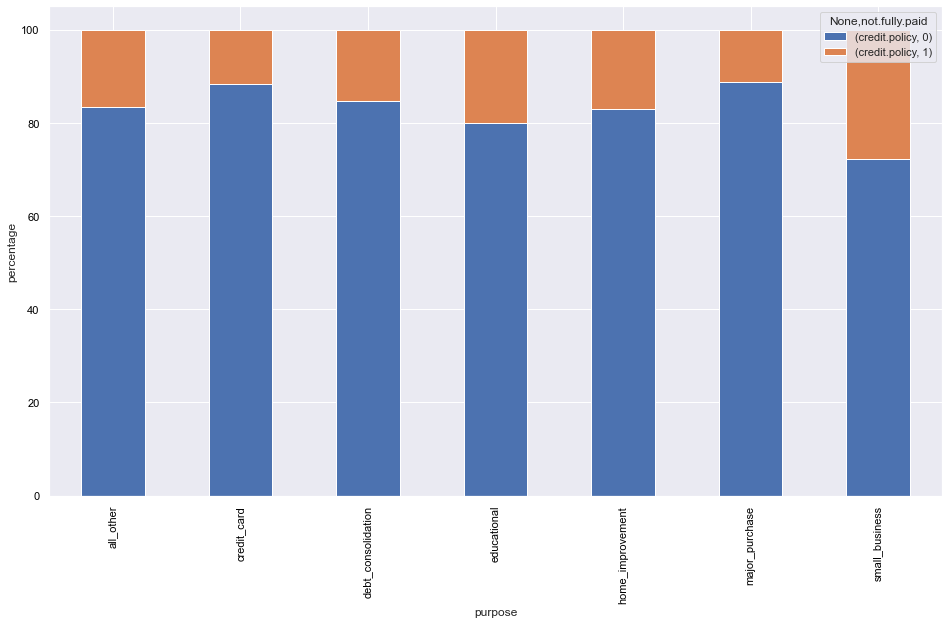

In [11]:
df = pd.DataFrame(loans[['purpose','not.fully.paid','credit.policy']])
df = df.groupby(['purpose','not.fully.paid']).count()
df
# calculate percentage breakdown
df2 = df.groupby(level=0).apply(lambda x: x/x.sum()*100)
ax = df2.unstack(level=1).plot(kind='bar',figsize=(16,9), stacked=True)
ax.set_ylabel('percentage')

##### Observation 
Most of the loans were issued for the purpose of debt consolidation. Looking at the breakdown by percentage, it is actually _small_business_ loans that has the highest percentage of not fully paid loans. 

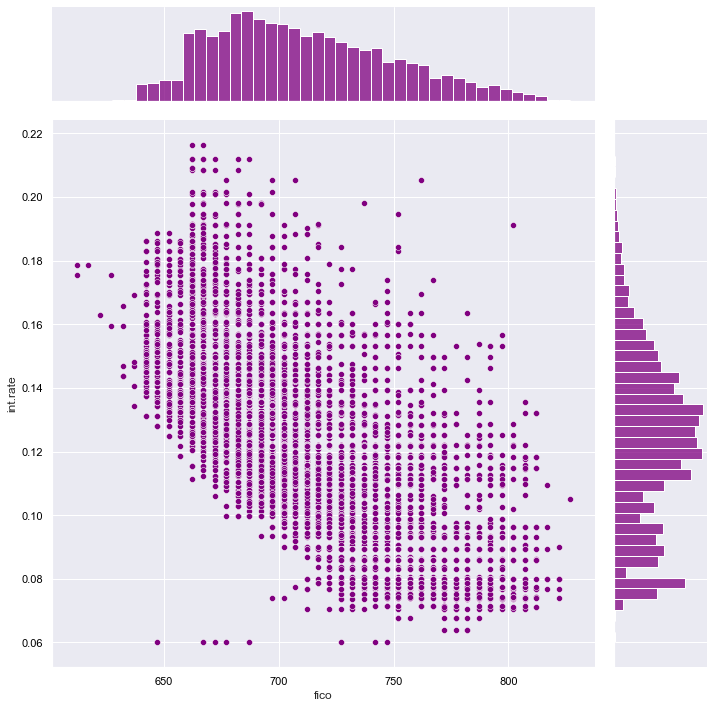

In [12]:
sns.jointplot(x='fico',y='int.rate',data=loans,height=10,color='purple',)

##### Observation 
As expectd, the vast majority of interest rates decrease as the fico score increases. With the exception of a small number of outliers. 

<Figure size 792x504 with 0 Axes>

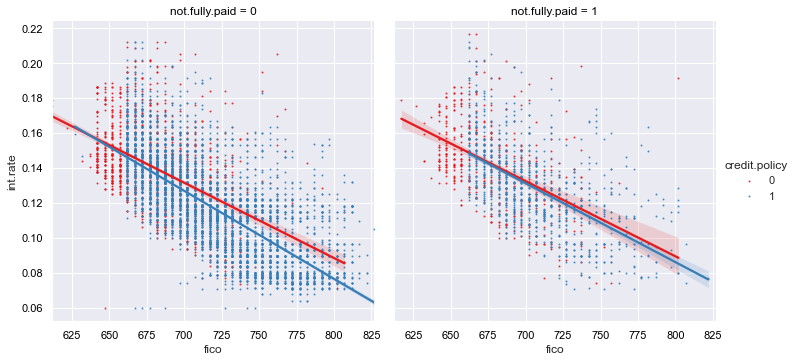

In [34]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy',
           col='not.fully.paid',palette='Set1', scatter_kws={"s": 1})

##### Observation 
Splitting the scatter plot by _not.fully.paid_ status and by _credit policy_ did not produce significant visual differences.

#### Data Cleaning 
The `purpose` column in `loans` is a categorical feature. It needs to be converted into a numerical input to be ingested by the model. Use `pd.get_dummies` to create columns that will be binary values to represent the purpose of the loan

In [35]:
# set drop_first to True to drop a redundant column 
final_data = pd.get_dummies(loans, columns=['purpose'], drop_first=True)

In [38]:
final_data.info()
# the purpose column has been replaced with 6 binary columns. The 'all_other' purpose
# was dropped in the drop_first command to eliminate redundancy. 
# (ie if all purpose columns are 0, then the purpose is 'all_other')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
y= final_data['not.fully.paid']
X = final_data.drop('not.fully.paid',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#### Decision Tree Model

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [21]:
dtree = DecisionTreeClassifier()

In [22]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [23]:
predictions = dtree.predict(X_test)

In [42]:
print ('Decision Tree perfromance')
print ('\n')
print (confusion_matrix(y_test, predictions))
print ('\n')
print (classification_report(y_test, predictions))

Decision Tree perfromance


[[1977  454]
 [ 337  106]]


              precision    recall  f1-score   support

           0       0.85      0.81      0.83      2431
           1       0.19      0.24      0.21       443

    accuracy                           0.72      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.75      0.72      0.74      2874



#### Random Forest model

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rfc = RandomForestClassifier(n_estimators=400)

In [29]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [30]:
rfc_pred = rfc.predict(X_test)

In [46]:
print ('Random Forest perfromance')
print ('\n')
print (confusion_matrix(y_test,rfc_pred))
print ('\n')
print (classification_report(y_test,rfc_pred))

Random Forest perfromance


[[2423    8]
 [ 435    8]]


              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.50      0.02      0.03       443

    accuracy                           0.85      2874
   macro avg       0.67      0.51      0.48      2874
weighted avg       0.79      0.85      0.78      2874



## Conclusion 
Overall, the random forest model performed better than the single decision tree, but had really poor f1 and recall scores in predicting loans that were not repaid. The EDA indicated this might be the case as there weren't too many distinguishing features between when loans were repaid and not. 
<br><br>
A vast majority of the loans that the LendingClub issued were repaid, which skewed the dataset. We can see from the confusion matrix that both the decision tree and random forest produced a significnat number of True Negative results (predicting that loan would not be paid in full when it actually was).
<br><br> 
This data was published in **2016** which was the year that the LendingClub was exposed for fraudulently selling and repurchasing  $22mil in loans ([source](https://www.centerforfinancialinclusion.org/the-lending-club-scandal-and-what-it-means-for-marketplace-lending)). It's reasonable to assume this is reflected in the fact that a large majority of the funds were repaid. 